# [Solved] Lab 8: **Implicit bias** of gradient descent: the case of *linear regression*

Advanced Topics in Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/solutions/AdvML_UniTS_2023_Lab_08_Implicit_Bias_Solved.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

#### Overview of the *Lab*

In this lab, we will study the *implicit bias* induced by *Gradient Descent* optimization in the simple case of *linear regression*, fitted on a *toy* dataset. In particular, we will show that *GD*-optimized weights converge to the **least norm** solution of the *linear regression* problem.

An analysis of implicit bias induced by *Stochastic Gradient Descent* in *full-width linear fully-connected* and *full-width linear convolutional* neural networks (which are much more complex and expressive models!) is provided in [this paper](https://arxiv.org/abs/1806.00468).


#### Linear regression

In the case of **linear regression**, fitted by means of *least squares*, we optimize the following loss function:
$$
L=\|y-Xw\|_{2}^{2}
$$.

If we choose the *GD* optimization algorithm, we perform weight updates proportional to the gradient of the loss function:
$$
\nabla_{w} L = -X(y-Xw)
$$.

Additionally, notice that the **least norm** solution of the *linear regression* problem is given by:
$$
w^{*}=(X^{T}X)^{-1}X^{T}y
$$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### To-do:

The following *toy* dataset is provided:

In [2]:
m, n = 1000, 10
X = np.random.normal(0, 1, (m, n))
b = X.dot(np.random.normal(0, 1, n))

1. Compute the *least norm* solution of the linear regression problem;
2. Write a function that computes the gradient of the loss function, as required by *GD* optimization;
3. Perform *GD* optimization of the linear regression problem iteratively, storing the weights at each iteration;
4. Plot the evolution of the weights during *GD* optimization and comment.


In [3]:
def least_norm_reg(_x, _b, _eps):
    # The regularizer `eps` allows to make the matrix invertible!
    return np.linalg.inv(_x.T.dot(_x) + _eps * np.eye(n)).dot(_x.T).dot(_b)

In [4]:
def least_squares_reg_gradient(_x, _b, _w, _m):
    return _x.T.dot(_x.dot(_w) - _b) / _m

In [5]:
def run_gd(steps, init_w, grad_fx):
    ws = [init_w]
    for step in steps:
        ws.append(ws[-1] - step * grad_fx(ws[-1]))
    return ws

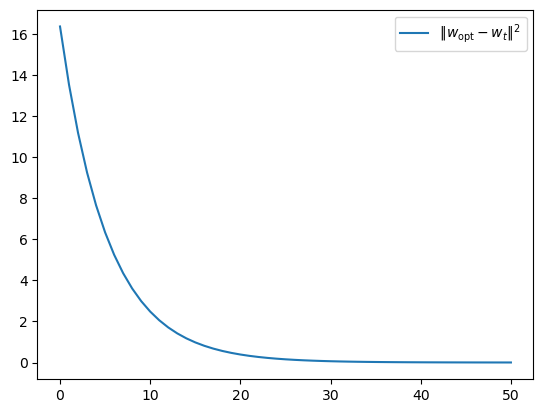

In [6]:
# Least norm solution
w_opt = least_norm_reg(X, b, 1e-6)

# Initialize weights to 0
w0 = np.zeros(n)

# Run GD for 100 steps
grad_w = lambda _w: least_squares_reg_gradient(X, b, _w, m)
wslist = run_gd([0.1] * 50, w0, grad_w)

# Plot
_ = plt.plot(
    range(len(wslist)),
    [np.linalg.norm(w_opt - w) ** 2 for w in wslist],
    label="$|\!|w_{\mathrm{opt}}-w_{t}|\!|^2$",
)
_ = plt.legend()